In [2]:
# ===============================
# 📦 CREDIT CARD FRAUD DETECTION - STEP 1
# Loading and exploring the dataset
# ===============================

# Importing essential libraries
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv("creditcard.csv")

# Showing basic info about the dataset
print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)  # rows, columns
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Checking for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


✅ Dataset loaded successfully!
Shape of dataset: (284807, 31)

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage distribution:
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


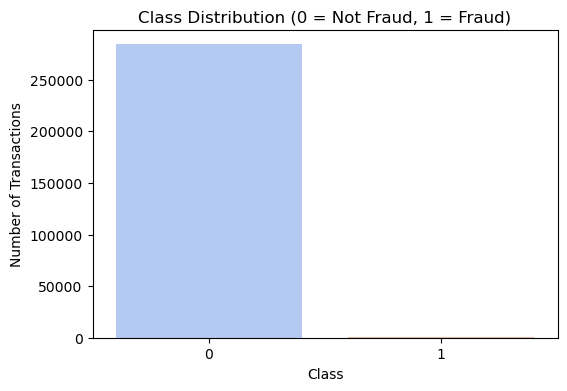

✅ Class distribution plot saved at: plots\class_distribution.png


In [3]:
# --- Cell 2: Checking class distribution and saving plot ---
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Count the occurrences of each class
class_counts = df['Class'].value_counts()

print("Class distribution:")
print(class_counts)
print("\nPercentage distribution:")
print((class_counts / len(df)) * 100)

# Create 'plots' folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Visualize and save the imbalance plot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm')
plt.title('Class Distribution (0 = Not Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')

# Save plot
plot_path = os.path.join("plots", "class_distribution.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"✅ Class distribution plot saved at: {plot_path}")


In [4]:
# --- Cell 3: Splitting and Scaling the data ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling 'Time' and 'Amount' columns
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

print("✅ Data split and scaled successfully!")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


✅ Data split and scaled successfully!
Training set shape: (227845, 30)
Test set shape: (56962, 30)


In [5]:
# ===============================
# ⚖️ STEP 4: Handling Class Imbalance (SMOTE)
# ===============================
from imblearn.over_sampling import SMOTE
from collections import Counter

# Checking imbalance in training set before SMOTE
print("Before SMOTE:", Counter(y_train))

# Applying SMOTE only on the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Checking the new class distribution
print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({0: 227451, 1: 394})
After SMOTE: Counter({0: 227451, 1: 227451})


In [6]:
!pip install xgboost


🔹 Training Logistic Regression...
✅ Logistic Regression trained successfully!
🔹 Training Random Forest...
✅ Random Forest trained successfully!
🔹 Training XGBoost...


C:\Users\mundo\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost trained successfully!

📊 Model Comparison:


,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.057990,0.918367,0.109091
1,Random Forest,0.845361,0.836735,0.841026
2,XGBoost,0.731092,0.887755,0.801843


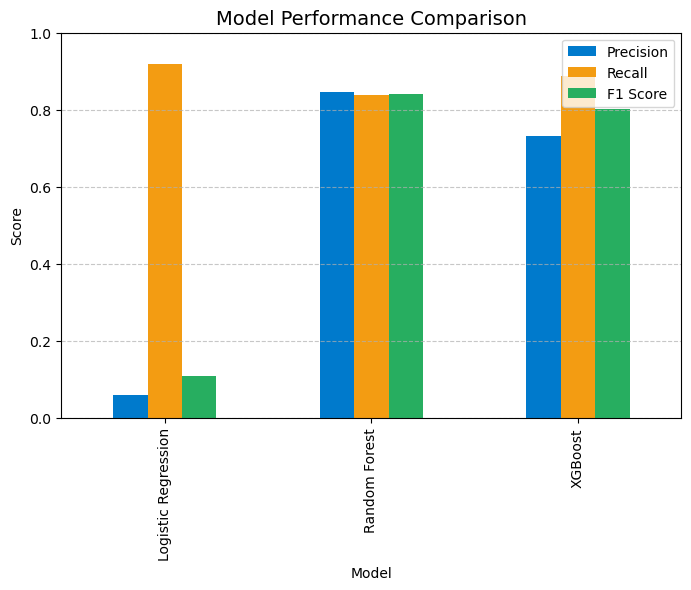

📁 Model comparison plot saved to: plots\model_comparison.png
🏆 Best model: Random Forest saved successfully as 'best_model_random_forest.pkl'


In [7]:
# ===============================
# 🤖 STEP 5: Training and Comparing Multiple Models (with Plot Saving)
# ===============================

import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import joblib

# Create a folder for saving plots if it doesn't exist
plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate
results = []

for name, model in models.items():
    print(f"🔹 Training {name}...")
    model.fit(X_train_res, y_train_res)
    print(f"✅ {name} trained successfully!")

    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison:")
display(results_df)

# Plot comparison
ax = results_df.set_index("Model")[["Precision", "Recall", "F1 Score"]].plot(
    kind="bar", figsize=(8,5), color=["#007acc", "#f39c12", "#27ae60"]
)
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Save the plot
plot_path = os.path.join(plots_dir, "model_comparison.png")
plt.savefig(plot_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"📁 Model comparison plot saved to: {plot_path}")

# Find and save the best model
best_model_name = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
model_filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(best_model, model_filename)

print(f"🏆 Best model: {best_model_name} saved successfully as '{model_filename}'")



✅ Loaded model: best_model_random_forest.pkl


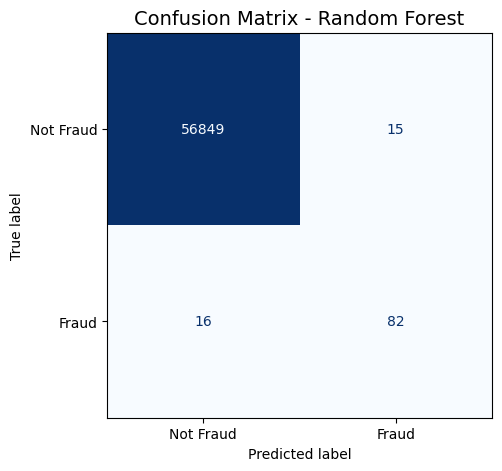

📁 Confusion matrix saved to: plots\confusion_matrix_random_forest.png


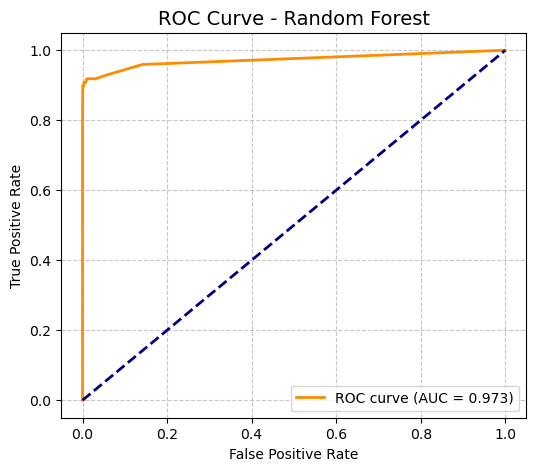

📁 ROC curve saved to: plots\roc_curve_random_forest.png
📋 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
# ===============================
# 📊 STEP 6: Evaluating the Best Model (Random Forest) + Saving Plots
# ===============================

import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import joblib

# Ensure the plots directory exists
plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# Load the saved best model
best_model_path = "best_model_random_forest.pkl"
best_model = joblib.load(best_model_path)
print(f"✅ Loaded model: {best_model_path}")

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# ===============================
# 🔷 Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])

fig, ax = plt.subplots(figsize=(6,5))
disp.plot(cmap="Blues", ax=ax, colorbar=False)
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.grid(False)

# Save confusion matrix plot
cm_plot_path = os.path.join(plots_dir, "confusion_matrix_random_forest.png")
plt.savefig(cm_plot_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"📁 Confusion matrix saved to: {cm_plot_path}")

# ===============================
# 🟠 ROC Curve
# ===============================
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.7)

# Save ROC curve plot
roc_plot_path = os.path.join(plots_dir, "roc_curve_random_forest.png")
plt.savefig(roc_plot_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"📁 ROC curve saved to: {roc_plot_path}")

# ===============================
# 📋 Classification Report
# ===============================
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))
